### Sports Losing Streaks

This is a notebook I created to demonstrate how long-run losing streaks in sports **aren't** all that rare.

The first variable is the number of years/seasons you want your simulation to run.  My default here is 100.

In [72]:
%matplotlib inline
# Set Matplotlib to print on this notebook as opposed to producing a new window
# Import libraries
import random
import matplotlib.pyplot as plt
import numpy as np
# Number of years/seasons to simulate
NumberOfYears = 100

Next create an array of all teams in your league.  I used the current MLB teams.

In [73]:
TeamArray = ['Arizona Diamondbacks','Atlanta Braves','Baltimore Orioles','Boston Red Sox','Chicago White Sox','Chicago Cubs',\
    'Cincinnati Reds','Cleveland Indians','Colorado Rockies','Detroit Tigers','Houston Astros',\
    'Kansas City Royals','Los Angeles Angels','Los Angeles Dodgers','Miami Marlins','Milwaukee Brewers',\
    'Minnesota Twins','New York Mets','New York Yankees','Oakland Athletics','Philadelphia Phillies','Pittsburgh Pirates',\
    'San Diego Padres','San Francisco Giants','Seattle Mariners','St. Louis Cardinals','Tampa Bay Rays','Texas Rangers',\
    'Toronto Blue Jays','Washington Nationals']
NumberOfTeams = len(TeamArray)

Loop through the number of years and randomly select the winner that year.  We are assuming that for each year, each team has an equal probability of winning (uniformly distributed).

In [74]:
# Simulate the seasons
YearlyVictor = np.zeros(NumberOfYears, dtype=np.int) # Declare array for the yearly winner
for i in range(0, NumberOfYears):
    YearlyVictor[i] = random.randint(0, NumberOfTeams-1) # Array index starts at zero

We have simulated the winner for every year, let's look at the results.

In [75]:
# Find the number of victories for each team
NumberOfVictories = np.zeros(NumberOfTeams, dtype=np.int)
print('Number of Victories for each team over', NumberOfYears, 'years')
NumberOfVictories = np.bincount(YearlyVictor, minlength=NumberOfTeams)
for i in range(0,NumberOfTeams):
    print(TeamArray[i] + ': ', NumberOfVictories[i])

Number of Victories for each team over 100 years
Arizona Diamondbacks:  3
Atlanta Braves:  5
Baltimore Orioles:  1
Boston Red Sox:  4
Chicago White Sox:  0
Chicago Cubs:  7
Cincinnati Reds:  1
Cleveland Indians:  2
Colorado Rockies:  3
Detroit Tigers:  5
Houston Astros:  3
Kansas City Royals:  1
Los Angeles Angels:  2
Los Angeles Dodgers:  1
Miami Marlins:  2
Milwaukee Brewers:  5
Minnesota Twins:  5
New York Mets:  3
New York Yankees:  6
Oakland Athletics:  3
Philadelphia Phillies:  3
Pittsburgh Pirates:  2
San Diego Padres:  3
San Francisco Giants:  7
Seattle Mariners:  3
St. Louis Cardinals:  7
Tampa Bay Rays:  3
Texas Rangers:  4
Toronto Blue Jays:  3
Washington Nationals:  3


Let's see how long of a drought each team had, too.

In [76]:
# Find the longest drought between wins for a team
LongestLosingStreak = np.zeros(NumberOfTeams, dtype=np.int) # Initialize to zero for each team
print('Longest title drought for each team over', NumberOfYears, 'years')
for i in range(0,NumberOfTeams):
    if(NumberOfVictories[i] > 0):
        CurTeamVictorYears = np.asarray(np.where(YearlyVictor == i))
        # Append the year zero to the front of the array
        CurTeamVictorYears = np.append(0, CurTeamVictorYears)
        # Append the last year of the simulation to check the time between it and the last victory
        CurTeamVictorYears = np.append(CurTeamVictorYears, NumberOfYears-1)
        for j in range(1,len(CurTeamVictorYears)):
            CurDiff = CurTeamVictorYears[j] - CurTeamVictorYears[j-1] 
            if(CurDiff > LongestLosingStreak[i]):
                LongestLosingStreak[i] = CurDiff

    # Change the print output depending on how many each team won
    if(NumberOfVictories[i] == 0):
        print(TeamArray[i], 'did not win at all')
    else:
        print(TeamArray[i], ':', LongestLosingStreak[i])
        

Longest title drought for each team over 100 years
Arizona Diamondbacks : 86
Atlanta Braves : 26
Baltimore Orioles : 98
Boston Red Sox : 42
Chicago White Sox did not win at all
Chicago Cubs : 23
Cincinnati Reds : 58
Cleveland Indians : 63
Colorado Rockies : 38
Detroit Tigers : 65
Houston Astros : 74
Kansas City Royals : 86
Los Angeles Angels : 49
Los Angeles Dodgers : 97
Miami Marlins : 42
Milwaukee Brewers : 39
Minnesota Twins : 33
New York Mets : 70
New York Yankees : 25
Oakland Athletics : 60
Philadelphia Phillies : 56
Pittsburgh Pirates : 69
San Diego Padres : 44
San Francisco Giants : 25
Seattle Mariners : 62
St. Louis Cardinals : 21
Tampa Bay Rays : 42
Texas Rangers : 54
Toronto Blue Jays : 37
Washington Nationals : 35


Optional: Show a histogram of the number of championships won by team

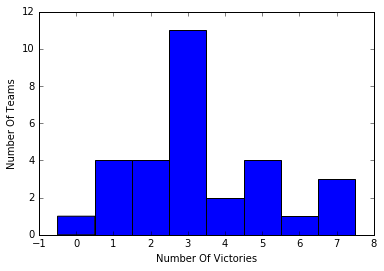

In [77]:
# What is the maximum number of victories
MinVictories = min(NumberOfVictories)
MaxVictories = max(NumberOfVictories)
BinValues = np.arange(-0.5,MaxVictories+1.5,1)
plt.hist(NumberOfVictories, BinValues)
plt.xlabel('Number Of Victories')
plt.ylabel('Number Of Teams')
plt.xlim(MinVictories-1,MaxVictories+1)
plt.show()